## Library

In [8]:
import os
import math
import dill
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt

exec(open('utils.py').read())
print('Loaded')

exec(open('modules/anchors.py').read())
print('Loaded')

%matplotlib inline

Loaded
Loaded


## Human brain (log FLOP/s)

In [9]:
# https://www.openphilanthropy.org/research/how-much-computational-power-does-it-take-to-match-the-human-brain/
# https://www.metaculus.com/questions/2646/what-will-the-necessary-computational-power-to-replicate-human-mental-capability-turn-out-to-be/
human_brain = sq.mixture([[0.5, sq.lognorm(13, 17, credibility=80)],
                          [0.5, sq.lognorm(13, 24, credibility=80)]])
sq.get_percentiles(human_brain @ 10000, digits=1)

{1: 10.7,
 5: 12.3,
 10: 13.0,
 20: 13.8,
 30: 14.4,
 40: 15.0,
 50: 15.7,
 60: 16.4,
 70: 17.3,
 80: 18.8,
 90: 21.6,
 95: 24.0,
 99: 28.8}

Simple lifetime
{1: 19.7,
 5: 21.3,
 10: 22.0,
 20: 22.8,
 30: 23.4,
 40: 24.0,
 50: 24.6,
 60: 25.3,
 70: 26.3,
 80: 27.9,
 90: 30.5,
 95: 32.8,
 99: 37.6}
-
GPT2 (~21 log FLOP) can do it: 3.9%
GPT3 (~23 log FLOP) can do it: 23.7%
GPT4 (~25 log FLOP) can do it: 56.1%
GPT5 (~27 log FLOP) can do it: 75.3%
-


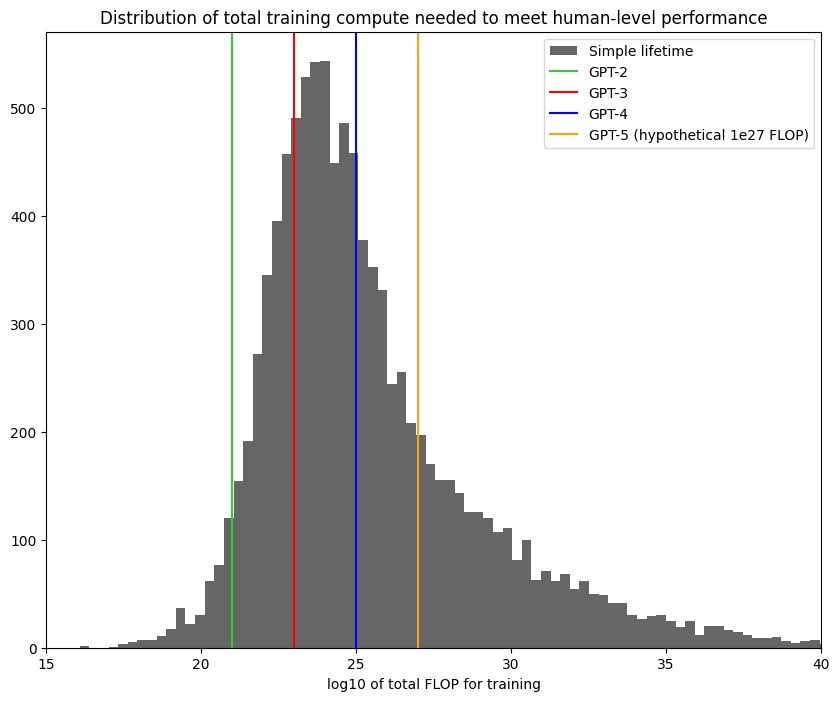

In [10]:
thirty_years_in_seconds = 30 * 365 * 24 * 60 * 60

simple_lifetime_anchor = tai_log_flop_needs(brain=human_brain,
                                            horizon_length=np.log10(thirty_years_in_seconds),
                                            ref_params=0,
                                            ref_params_samples=0,
                                            bayes_update=None)

plot_anchors(anchor1=simple_lifetime_anchor @ 10000,
             label1='Simple lifetime',
             anchor2=21,
             label2='GPT-2',
             anchor3=23,
             label3='GPT-3',
             anchor4=25,
             label4='GPT-4',
             anchor5=27,
             label5='GPT-5 (hypothetical 1e27 FLOP)',
             disable_ci_lines=True,
             xlim=[15,40])

Simple lifetime
{1: 19.8,
 5: 21.2,
 10: 22.0,
 20: 22.9,
 30: 23.5,
 40: 24.0,
 50: 24.7,
 60: 25.4,
 70: 26.3,
 80: 27.8,
 90: 30.5,
 95: 33.0,
 99: 37.8}
-
GPT2 (~21 log FLOP) can do it: 3.8%
GPT3 (~23 log FLOP) can do it: 22.1%
GPT4 (~25 log FLOP) can do it: 55.0%
GPT5 (~27 log FLOP) can do it: 74.9%
-
Cotra lifetime
{1: 25.4,
 5: 26.2,
 10: 26.7,
 20: 27.3,
 30: 27.6,
 40: 28.0,
 50: 28.5,
 60: 29.0,
 70: 29.8,
 80: 31.3,
 90: 34.0,
 95: 36.4,
 99: 41.4}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: <0.1%
GPT4 (~25 log FLOP) can do it: 0.3%
GPT5 (~27 log FLOP) can do it: 13.7%
-


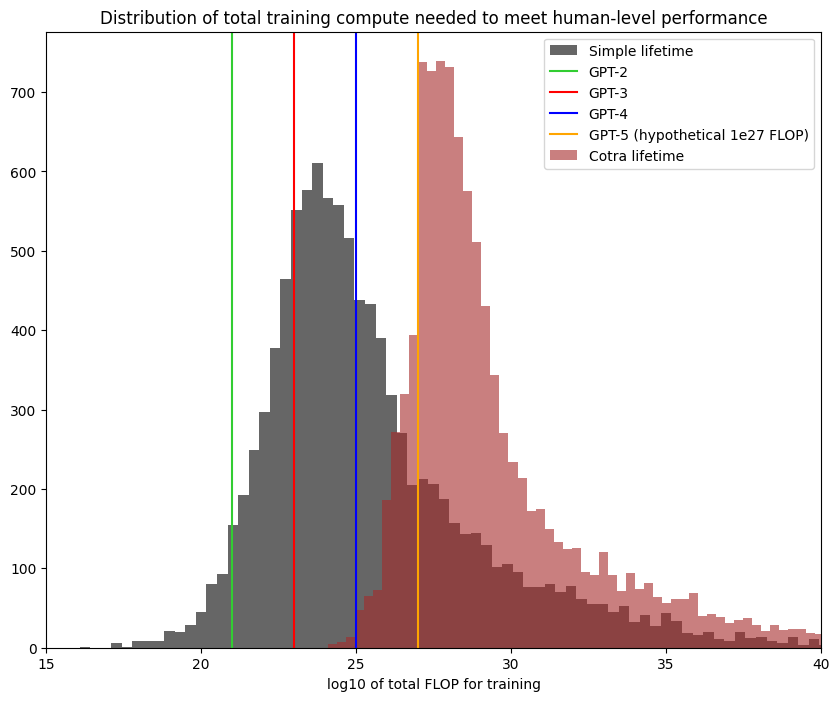

In [11]:
cotra_lifetime_anchor = tai_log_flop_needs(brain=human_brain,
                                           efficiency=sq.lognorm(2,5),
                                           horizon_length=9,
                                           ref_params=0,
                                           ref_params_samples=0,
                                           bayes_update=cotra_bayes_update_against_low_flop)


plot_anchors(anchor1=simple_lifetime_anchor @ 10000,
             label1='Simple lifetime',
             anchor2=21,
             label2='GPT-2',
             anchor3=23,
             label3='GPT-3',
             anchor4=25,
             label4='GPT-4',
             anchor5=27,
             label5='GPT-5 (hypothetical 1e27 FLOP)',
             anchor6=cotra_lifetime_anchor @ 10000,
             label6='Cotra lifetime',
             disable_ci_lines=True,
             xlim=[15,40])

## Cotra 2022 anchor

Loading from cache file (`caches/cotra_2022.sqcache.npy`)...
Cache from: 2023-10-02 14:11:08.589392
Anchor1
{1: 25.4,
 5: 26.7,
 10: 27.5,
 20: 28.8,
 30: 30.2,
 40: 31.8,
 50: 33.3,
 60: 34.9,
 70: 36.7,
 80: 38.7,
 90: 41.7,
 95: 44.3,
 99: 62.5}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: <0.1%
GPT4 (~25 log FLOP) can do it: 0.4%
GPT5 (~27 log FLOP) can do it: 6.2%
-


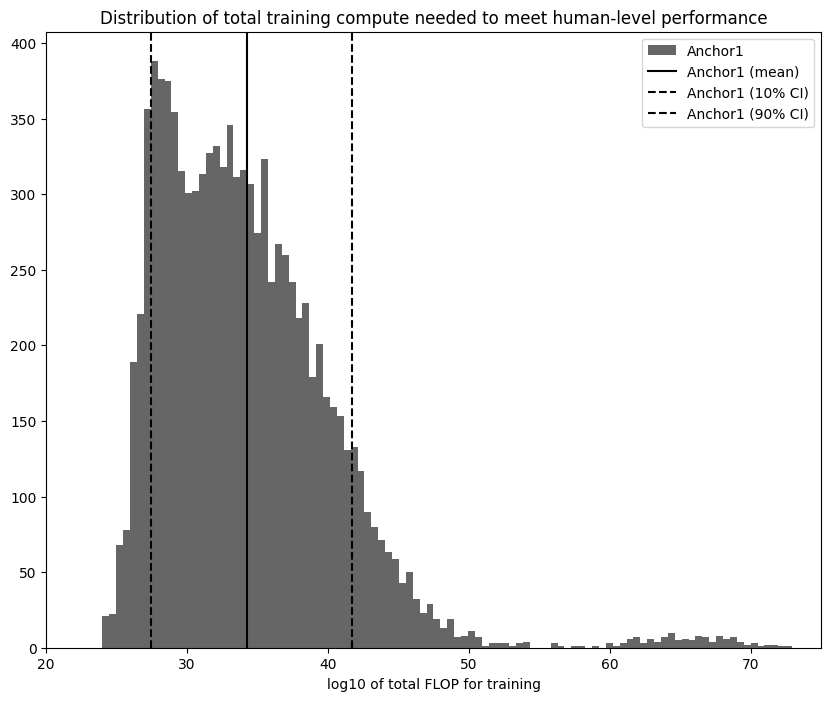

In [12]:
cotra_2022_samples = sq.sample(load_cache_file='caches/cotra_2022', n=10000, verbose=True)
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2022.sqcache.npy'))))
plot_anchors(cotra_2022_samples)

Cotra 2022
{1: 25.4,
 5: 26.7,
 10: 27.5,
 20: 28.8,
 30: 30.2,
 40: 31.8,
 50: 33.3,
 60: 34.9,
 70: 36.7,
 80: 38.7,
 90: 41.7,
 95: 44.3,
 99: 62.5}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: <0.1%
GPT4 (~25 log FLOP) can do it: 0.4%
GPT5 (~27 log FLOP) can do it: 6.2%
-


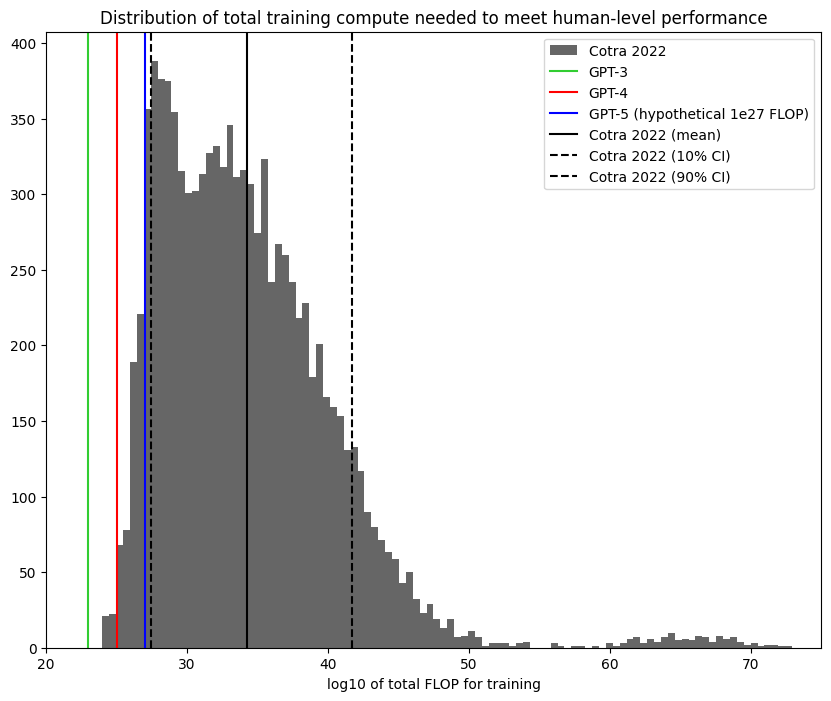

In [15]:
plot_anchors(anchor1=cotra_2022_samples,
             label1='Cotra 2022',
             anchor2=23,
             label2='GPT-3',
             anchor3=25,
             label3='GPT-4',
             anchor4=27,
             label4='GPT-5 (hypothetical 1e27 FLOP)')

### Narrower threat

Narrower Threat
{1: 23.0,
 5: 24.1,
 10: 24.8,
 20: 25.6,
 30: 26.3,
 40: 26.9,
 50: 27.6,
 60: 28.7,
 70: 30.5,
 80: 32.7,
 90: 36.0,
 95: 38.6,
 99: 44.4}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: 1.6%
GPT4 (~25 log FLOP) can do it: 11.7%
GPT5 (~27 log FLOP) can do it: 42.3%
-


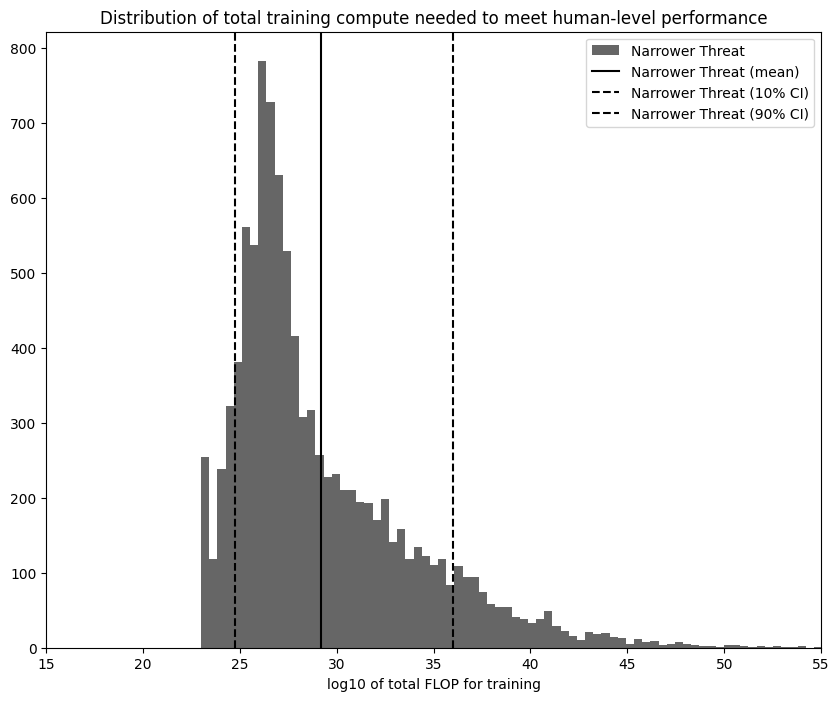

In [23]:
narrower_threat = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                     efficiency=sq.norm(-2,1),
                                     transformative_vs_human=-sq.lognorm(0.1,3),
                                     horizon_length=0,
                                     scaling_exponent=sq.norm(0.5,1.5),
                                     flops_per_param_per_sec=sq.norm(1,2),
                                     bayes_update=peter_bayes_update_against_low_flop)
narrower_threat_samples = sq.sample(narrower_threat, n=10000, verbose=True)
plot_anchors(narrower_threat_samples, xlim=[15,55], label1='Narrower Threat')

Narrower threat
{1: 23.0,
 5: 24.1,
 10: 24.8,
 20: 25.6,
 30: 26.3,
 40: 26.9,
 50: 27.6,
 60: 28.7,
 70: 30.5,
 80: 32.7,
 90: 36.0,
 95: 38.6,
 99: 44.4}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: 1.6%
GPT4 (~25 log FLOP) can do it: 11.7%
GPT5 (~27 log FLOP) can do it: 42.3%
-
Cotra 2022
{1: 25.4,
 5: 26.7,
 10: 27.5,
 20: 28.8,
 30: 30.2,
 40: 31.8,
 50: 33.3,
 60: 34.9,
 70: 36.7,
 80: 38.7,
 90: 41.7,
 95: 44.3,
 99: 62.5}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: <0.1%
GPT4 (~25 log FLOP) can do it: 0.4%
GPT5 (~27 log FLOP) can do it: 6.2%
-


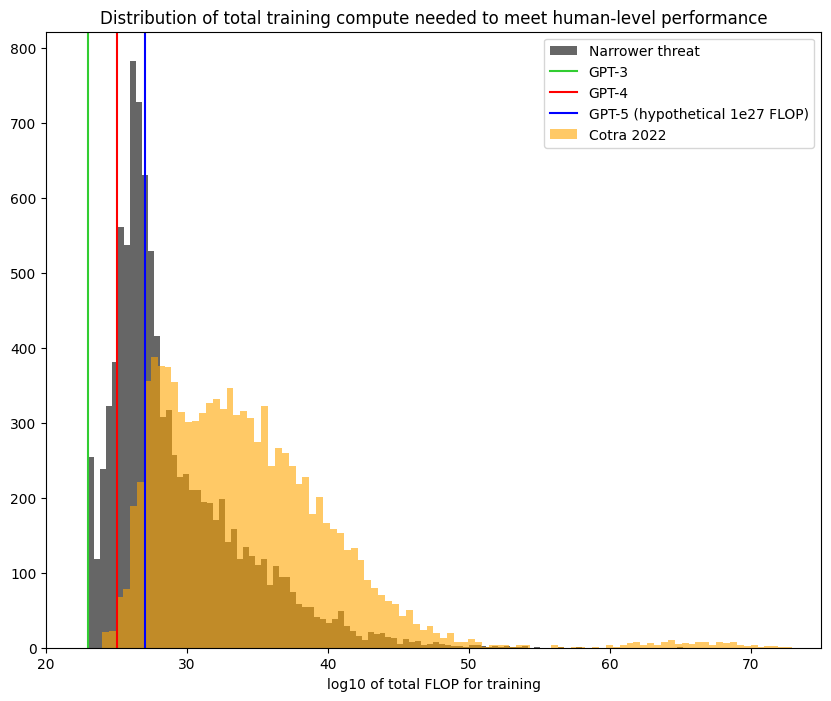

In [24]:
plot_anchors(anchor1=narrower_threat_samples,
             label1='Narrower threat',
             anchor2=23,
             label2='GPT-3',
             anchor3=25,
             label3='GPT-4',
             anchor4=27,
             label4='GPT-5 (hypothetical 1e27 FLOP)',
             anchor5=cotra_2022_samples,
             label5='Cotra 2022',
             disable_ci_lines=True)

### PASTA

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 1329457.04it/s]


Writing cache to file `caches/pasta.sqcache.npy`...
...Cached
PASTA
{1: 23.4,
 5: 24.8,
 10: 25.5,
 20: 26.4,
 30: 27.3,
 40: 28.4,
 50: 30.0,
 60: 31.8,
 70: 33.7,
 80: 36.1,
 90: 39.5,
 95: 42.5,
 99: 48.0}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: 0.6%
GPT4 (~25 log FLOP) can do it: 5.7%
GPT5 (~27 log FLOP) can do it: 27.0%
-


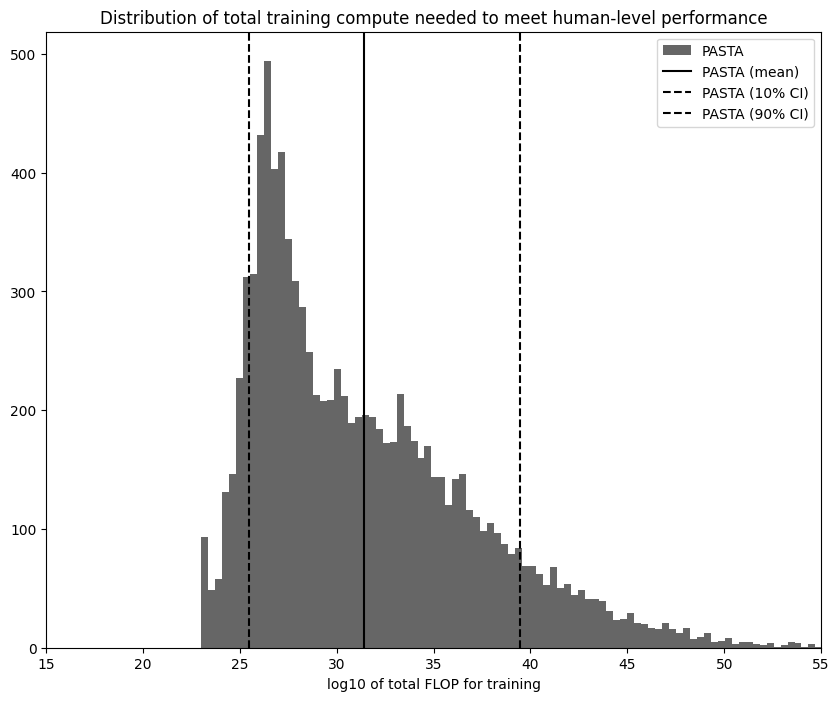

In [28]:
# https://www.lesswrong.com/posts/BGtjG6PzzmPngCgW9/revisiting-the-horizon-length-hypothesis
# what’s your guess for how much compute is needed for Davidson’s “AI that could readily automate 20% of cognitive tasks?” 

pasta_horizon_length = sq.mixture([[0.4, 0],
                                   [0.3, sq.norm(1,3)],
                                   [0.25, sq.lognorm(3,7)],
                                   [0.05, sq.norm(7,11)]], lclip=0)

pasta = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                           efficiency=sq.norm(-2,1),
                           transformative_vs_human=sq.norm(-2,2),
                           horizon_length=pasta_horizon_length,
                           scaling_exponent=sq.norm(0.5,1.5),
                           flops_per_param_per_sec=sq.norm(1,2),
                           bayes_update=peter_bayes_update_against_low_flop)

pasta_samples = sq.sample(pasta, n=10000, verbose=True, dump_cache_file='caches/pasta')
plot_anchors(pasta_samples, xlim=[15,55], label1='PASTA')

PASTA
{1: 23.4,
 5: 24.8,
 10: 25.5,
 20: 26.4,
 30: 27.3,
 40: 28.4,
 50: 30.0,
 60: 31.8,
 70: 33.7,
 80: 36.1,
 90: 39.5,
 95: 42.5,
 99: 48.0}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: 0.6%
GPT4 (~25 log FLOP) can do it: 5.7%
GPT5 (~27 log FLOP) can do it: 27.0%
-
Cotra 2022
{1: 25.4,
 5: 26.7,
 10: 27.5,
 20: 28.8,
 30: 30.2,
 40: 31.8,
 50: 33.3,
 60: 34.9,
 70: 36.7,
 80: 38.7,
 90: 41.7,
 95: 44.3,
 99: 62.5}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: <0.1%
GPT4 (~25 log FLOP) can do it: 0.4%
GPT5 (~27 log FLOP) can do it: 6.2%
-


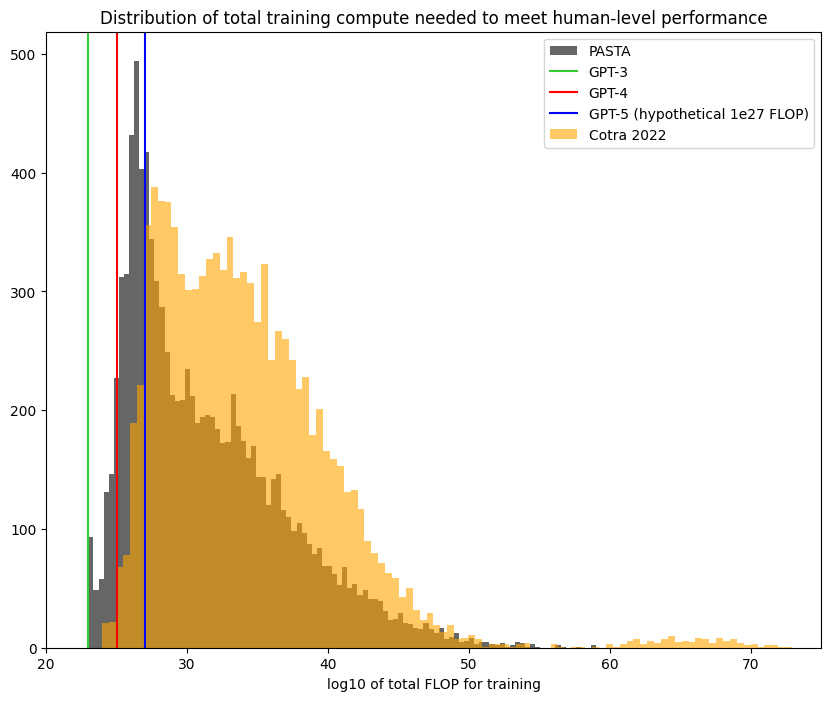

In [29]:
plot_anchors(anchor1=pasta_samples,
             label1='PASTA',
             anchor2=23,
             label2='GPT-3',
             anchor3=25,
             label3='GPT-4',
             anchor4=27,
             label4='GPT-5 (hypothetical 1e27 FLOP)',
             anchor5=cotra_2022_samples,
             label5='Cotra 2022',
             disable_ci_lines=True)

PASTA
{1: 23.4,
 5: 24.8,
 10: 25.5,
 20: 26.4,
 30: 27.3,
 40: 28.4,
 50: 30.0,
 60: 31.8,
 70: 33.7,
 80: 36.1,
 90: 39.5,
 95: 42.5,
 99: 48.0}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: 0.6%
GPT4 (~25 log FLOP) can do it: 5.7%
GPT5 (~27 log FLOP) can do it: 27.0%
-
Narrower Threat
{1: 23.0,
 5: 24.1,
 10: 24.8,
 20: 25.6,
 30: 26.3,
 40: 26.9,
 50: 27.6,
 60: 28.7,
 70: 30.5,
 80: 32.7,
 90: 36.0,
 95: 38.6,
 99: 44.4}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: 1.6%
GPT4 (~25 log FLOP) can do it: 11.7%
GPT5 (~27 log FLOP) can do it: 42.3%
-


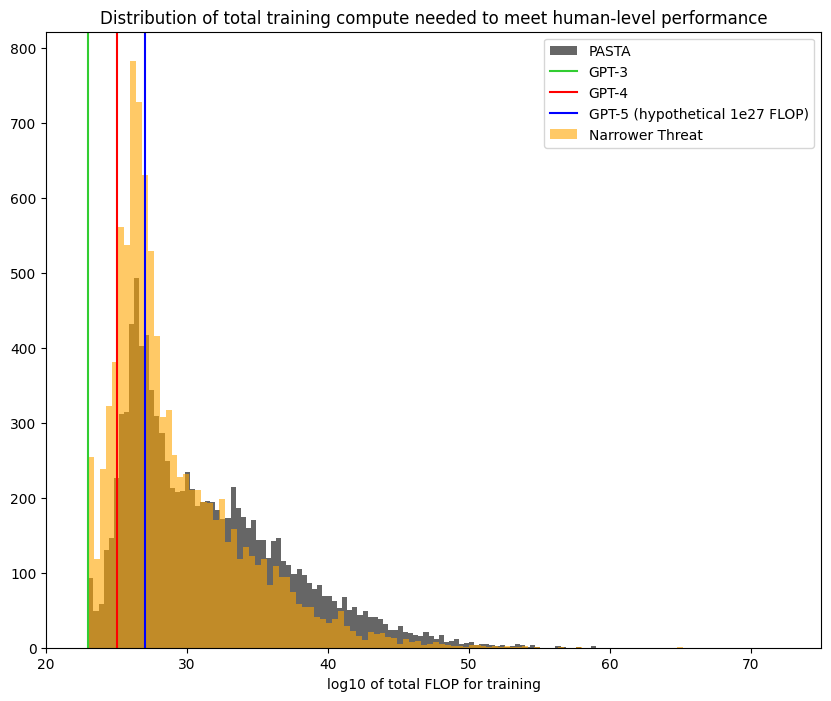

In [30]:
plot_anchors(anchor1=pasta_samples,
             label1='PASTA',
             anchor2=23,
             label2='GPT-3',
             anchor3=25,
             label3='GPT-4',
             anchor4=27,
             label4='GPT-5 (hypothetical 1e27 FLOP)',
             anchor5=narrower_threat_samples,
             label5='Narrower Threat',
             disable_ci_lines=True)

In [31]:
sq.get_percentiles(np.sort(pasta_samples) - np.sort(narrower_threat_samples), digits=1)

{1: 0.4,
 5: 0.7,
 10: 0.8,
 20: 0.8,
 30: 1.0,
 40: 1.5,
 50: 2.4,
 60: 3.0,
 70: 3.3,
 80: 3.3,
 90: 3.5,
 95: 3.8,
 99: 3.9}

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 2576037.34it/s]

Writing cache to file `caches/minimal_menace.sqcache.npy`...
...Cached
Anchor1
{1: 23.3,
 5: 24.7,
 10: 25.4,
 20: 26.4,
 30: 27.2,
 40: 28.2,
 50: 29.6,
 60: 31.5,
 70: 33.4,
 80: 35.8,
 90: 39.2,
 95: 42.1,
 99: 47.6}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: 0.6%
GPT4 (~25 log FLOP) can do it: 6.6%
GPT5 (~27 log FLOP) can do it: 27.8%
-


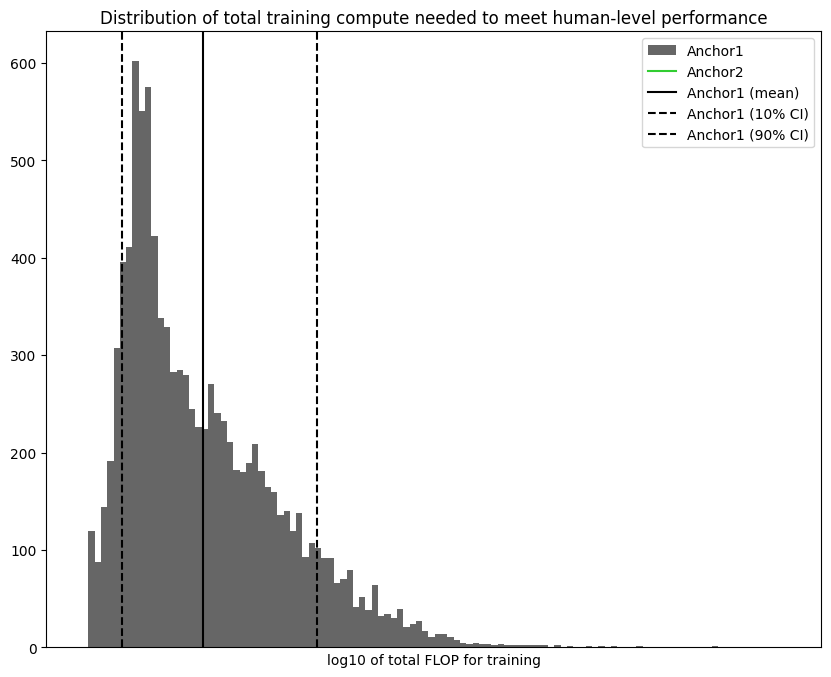

In [34]:
minimal_menace = sq.mixture([[0.1, narrower_threat], [0.9, pasta]])
minimal_menace_samples = sq.sample(minimal_menace, n=10000, verbose=True, dump_cache_file='caches/minimal_menace')
plot_anchors(minimal_menace_samples, 'Minimal menace')

Minimal menace
{1: 23.3,
 5: 24.7,
 10: 25.4,
 20: 26.4,
 30: 27.2,
 40: 28.2,
 50: 29.6,
 60: 31.5,
 70: 33.4,
 80: 35.8,
 90: 39.2,
 95: 42.1,
 99: 47.6}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: 0.6%
GPT4 (~25 log FLOP) can do it: 6.6%
GPT5 (~27 log FLOP) can do it: 27.8%
-
Cotra 2022
{1: 25.4,
 5: 26.7,
 10: 27.5,
 20: 28.8,
 30: 30.2,
 40: 31.8,
 50: 33.3,
 60: 34.9,
 70: 36.7,
 80: 38.7,
 90: 41.7,
 95: 44.3,
 99: 62.5}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: <0.1%
GPT4 (~25 log FLOP) can do it: 0.4%
GPT5 (~27 log FLOP) can do it: 6.2%
-


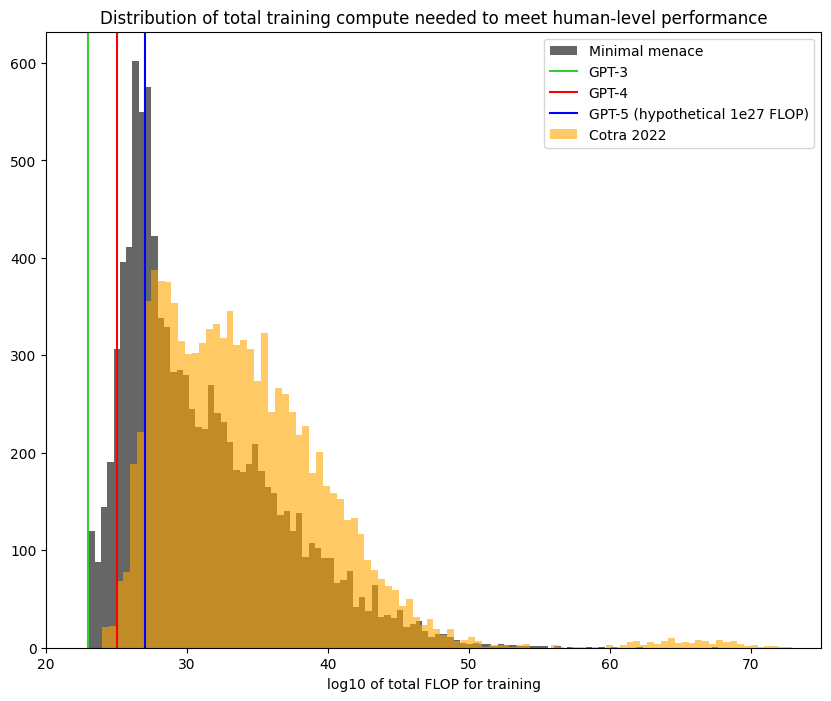

In [36]:
plot_anchors(anchor1=minimal_menace_samples,
             label1='Minimal menace',
             anchor2=23,
             label2='GPT-3',
             anchor3=25,
             label3='GPT-4',
             anchor4=27,
             label4='GPT-5 (hypothetical 1e27 FLOP)',
             anchor5=cotra_2022_samples,
             label5='Cotra 2022',
             disable_ci_lines=True)

Minimal menace
{1: 23.3,
 5: 24.7,
 10: 25.4,
 20: 26.4,
 30: 27.2,
 40: 28.2,
 50: 29.6,
 60: 31.5,
 70: 33.4,
 80: 35.8,
 90: 39.2,
 95: 42.1,
 99: 47.6}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: 0.6%
GPT4 (~25 log FLOP) can do it: 6.6%
GPT5 (~27 log FLOP) can do it: 27.8%
-
Narrower threat
{1: 23.0,
 5: 24.1,
 10: 24.8,
 20: 25.6,
 30: 26.3,
 40: 26.9,
 50: 27.6,
 60: 28.7,
 70: 30.5,
 80: 32.7,
 90: 36.0,
 95: 38.6,
 99: 44.4}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: 1.6%
GPT4 (~25 log FLOP) can do it: 11.7%
GPT5 (~27 log FLOP) can do it: 42.3%
-


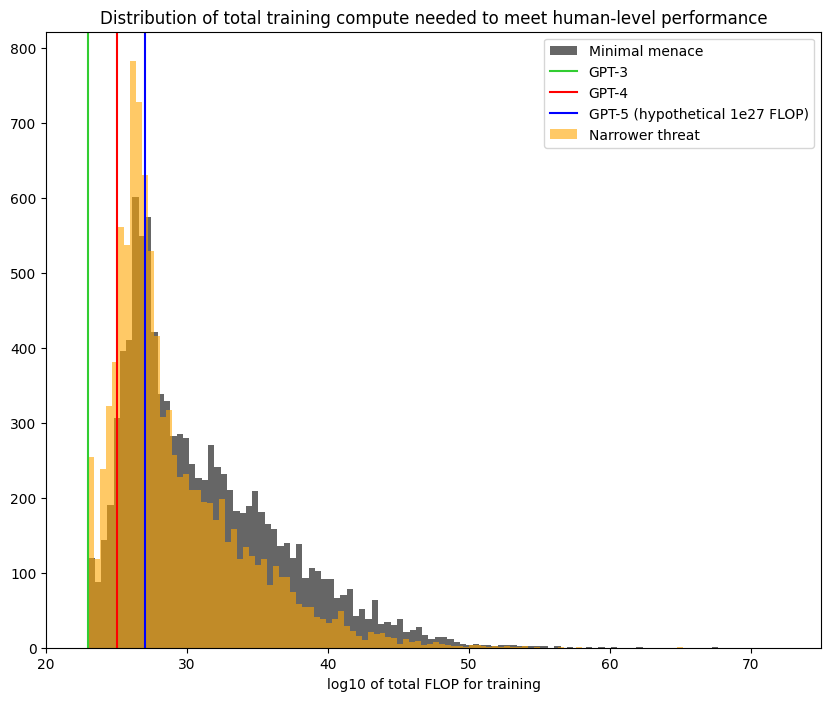

In [37]:
plot_anchors(anchor1=minimal_menace_samples,
             label1='Minimal menace',
             anchor2=23,
             label2='GPT-3',
             anchor3=25,
             label3='GPT-4',
             anchor4=27,
             label4='GPT-5 (hypothetical 1e27 FLOP)',
             anchor5=narrower_threat_samples,
             label5='Narrower threat',
             disable_ci_lines=True)

Minimal menace
{1: 23.3,
 5: 24.7,
 10: 25.4,
 20: 26.4,
 30: 27.2,
 40: 28.2,
 50: 29.6,
 60: 31.5,
 70: 33.4,
 80: 35.8,
 90: 39.2,
 95: 42.1,
 99: 47.6}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: 0.6%
GPT4 (~25 log FLOP) can do it: 6.6%
GPT5 (~27 log FLOP) can do it: 27.8%
-
PASTA
{1: 23.4,
 5: 24.8,
 10: 25.5,
 20: 26.4,
 30: 27.3,
 40: 28.4,
 50: 30.0,
 60: 31.8,
 70: 33.7,
 80: 36.1,
 90: 39.5,
 95: 42.5,
 99: 48.0}
-
GPT2 (~21 log FLOP) can do it: <0.1%
GPT3 (~23 log FLOP) can do it: 0.6%
GPT4 (~25 log FLOP) can do it: 5.7%
GPT5 (~27 log FLOP) can do it: 27.0%
-


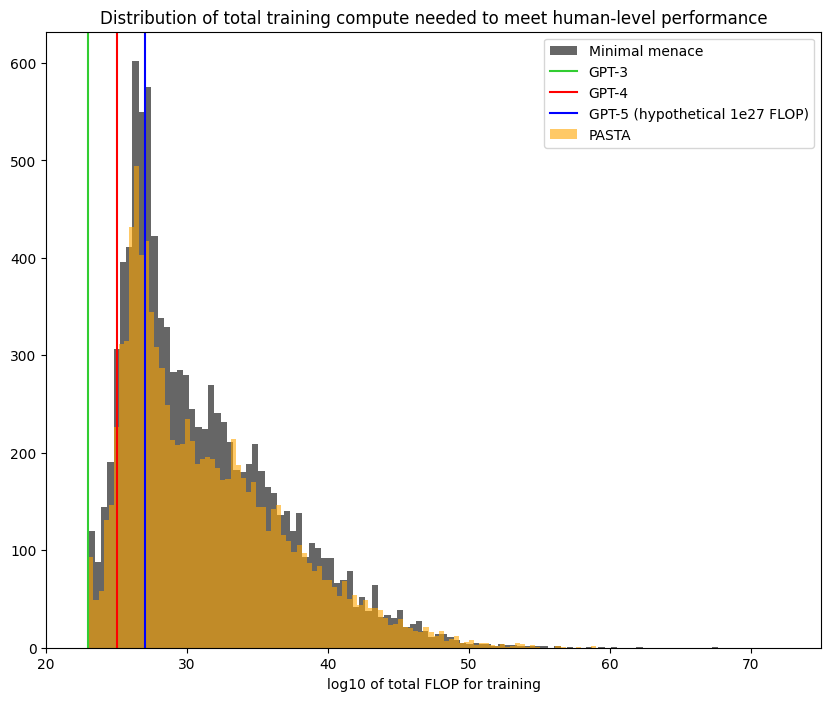

In [38]:
plot_anchors(anchor1=minimal_menace_samples,
             label1='Minimal menace',
             anchor2=23,
             label2='GPT-3',
             anchor3=25,
             label3='GPT-4',
             anchor4=27,
             label4='GPT-5 (hypothetical 1e27 FLOP)',
             anchor5=pasta_samples,
             label5='PASTA',
             disable_ci_lines=True)

In [39]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2023-10-02 14:28:53.174011
